# Assignment 1 (alternative version)

Показать на эксперименте, что верхняя оценка на вероятность коллизии композиционного хеша для строк выполняется $O(\frac 1 m + \frac L p)$. Подробнее в материалах лекции.

Построить графики зависимости FPR от длинны строк L и простого модуля p.

Эксперименты провести для L = np.linspace(10, 100, 11) и 10 простых чисел p из интервала (100, 1000). Для каждой точки выполнить 10 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке.

In [58]:
import numpy as np
import random
from string import ascii_letters
from collections import Counter

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Функции с семинара

In [59]:
def hash_int(x, a=112, b=22, p=997):
    return (a*x + b) % p


def poly_hash(s, p=997, x=31):
    h = 0
    
    for j in range(len(s)-1, -1, -1):
        h = (h * x + ord(s[j]) + p) % p
        
    return h

In [60]:
def get_hash(s, p):
    return hash_int(poly_hash(s, p), p)

Всякие нужные функции:

In [61]:
def get_ten_p():
    nums = set()
    
    while len(nums) != 10:
        p = random.randint(100, 1000)
        counter = 0
        
        for i in range(2, p):
            if p % i == 0:
                counter = 1
        
        if counter == 0:
            nums.add(p)
        
    return sorted(list(nums))

In [62]:
def get_strings(size, seed):
    random.seed(seed)
    strings = set()
    
    while len(strings) != n:
        new_string = ''.join([random.choice(ascii_letters) for i in range(size)])
        strings.add(new_string)
        
    return strings

In [63]:
def get_fpr(hashes):
    collisions = 0
    counter = Counter(hashes)
    
    for elem in counter:
        if counter[elem] > 1:
            collisions += counter[elem] // 2
                
    return collisions * 2 / (n * (n - 1))

In [64]:
def get_means_and_stds(fixed, changing, mode):
    means, stds = [], []
    
    for change in changing:
        change = int(change)
        fprs = []

        for seed in seeds:
            if mode == 'p':
                strings = get_strings(change, seed)
                hashes = [get_hash(s, fixed) for s in strings]
            else:
                strings = get_strings(fixed, seed)
                hashes = [get_hash(s, change) for s in strings]
                
            fpr = get_fpr(hashes)
            fprs.append(fpr)

        means.append(np.mean(fprs))
        stds.append(np.std(fprs))
        
    return means, stds

In [65]:
def draw_plot(needed_range, means, stds, xlabel, title):
    plt.figure(figsize=(15, 10))
    plt.errorbar(needed_range, means, stds, fmt='-o', label='mean FPR')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('FPR')
    plt.legend()
    plt.show()

Зададим L, десять штук p, число генерируемых строк и сиды:

In [66]:
L = np.linspace(10, 100, 11)
ten_p = get_ten_p()

n = 100
seeds = random.sample(range(1488), 10)

Эксперимент 1: фиксируем p.

In [67]:
p = random.choice(ten_p)
p

197

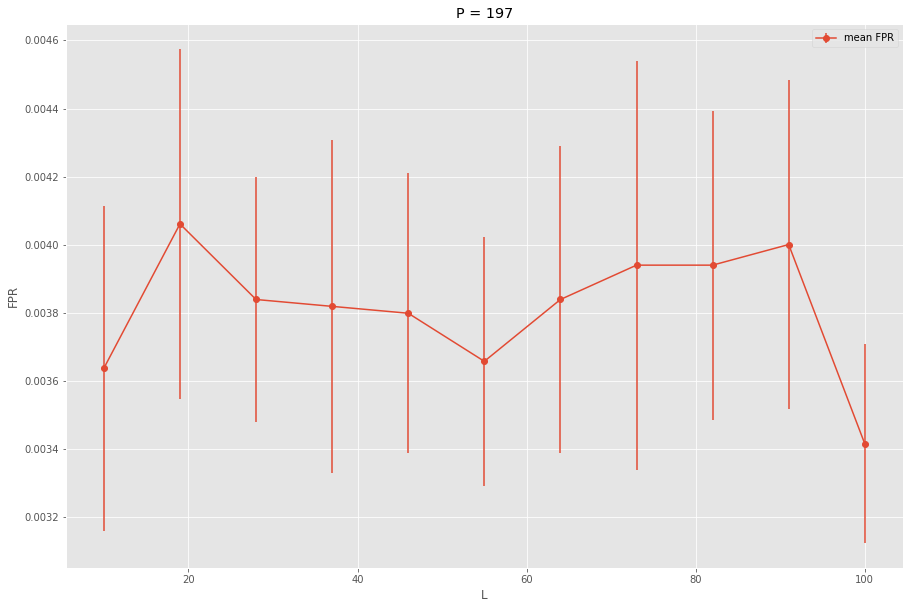

In [68]:
means_p, stds_p = get_means_and_stds(p, L, 'p')
draw_plot(L, means_p, stds_p, 'L', 'P = %s' % p)

Как видно из графика, утверждение "чем больше L, тем больше число коллизий" не всегда верно: количество коллизий меняется.

Эксперимент 2: фиксируем l. 

In [69]:
l = int(random.choice(L))
l

64

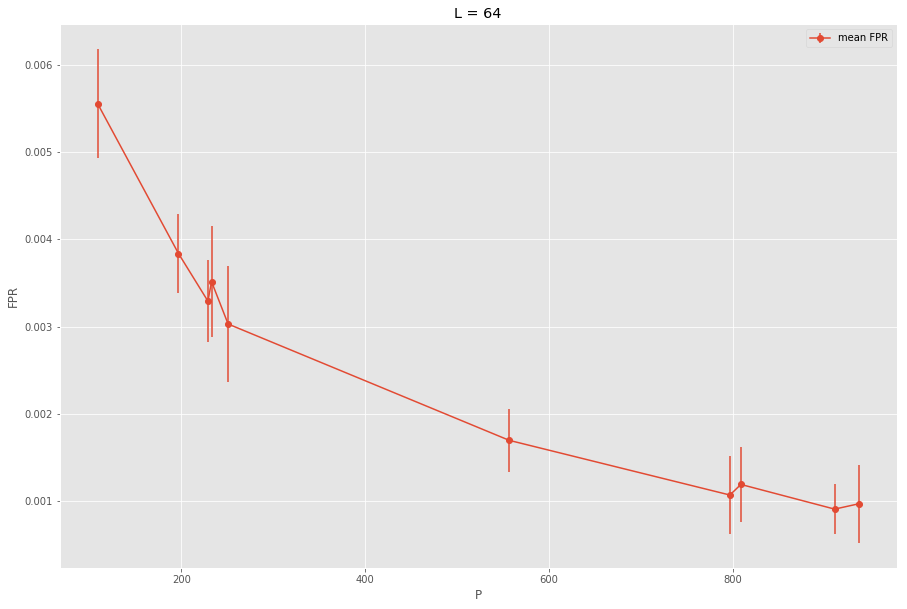

In [70]:
means_l, stds_l = get_means_and_stds(l, ten_p, 'l')
draw_plot(ten_p, means_l, stds_l, 'P', 'L = %s' % l)

Тут из графика очевидно, что с ростом p число коллизий гиперболически уменьшается, из чего можно сделать вывод о том, что $O(\frac 1 m + \frac L p)$ действительно является верхней оценкой для вероятности коллизий.